In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
file_path = "dataset.csv"
df = pd.read_csv(file_path)

In [22]:
# Display basic information about the dataset
print("Basic information about the dataset:")
print(df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Entity                                  6840 non-null   object
 1   Code                                    6840 non-null   object
 2   Year                                    6840 non-null   int64 
 3   Meningitis fatalities                   6840 non-null   int64 
 4   Dementia fatalities                     6840 non-null   int64 
 5   Parkinson s fatalities                  6840 non-null   int64 
 6   Nutritional deficiency fatalities       6840 non-null   int64 
 7   Malaria fatalities                      6840 non-null   int64 
 8   Drowning fatalities                     6840 non-null   int64 
 9   Interpersonal violence fatalities       6840 non-null   int64 
 10  Maternal disorder fatalities       

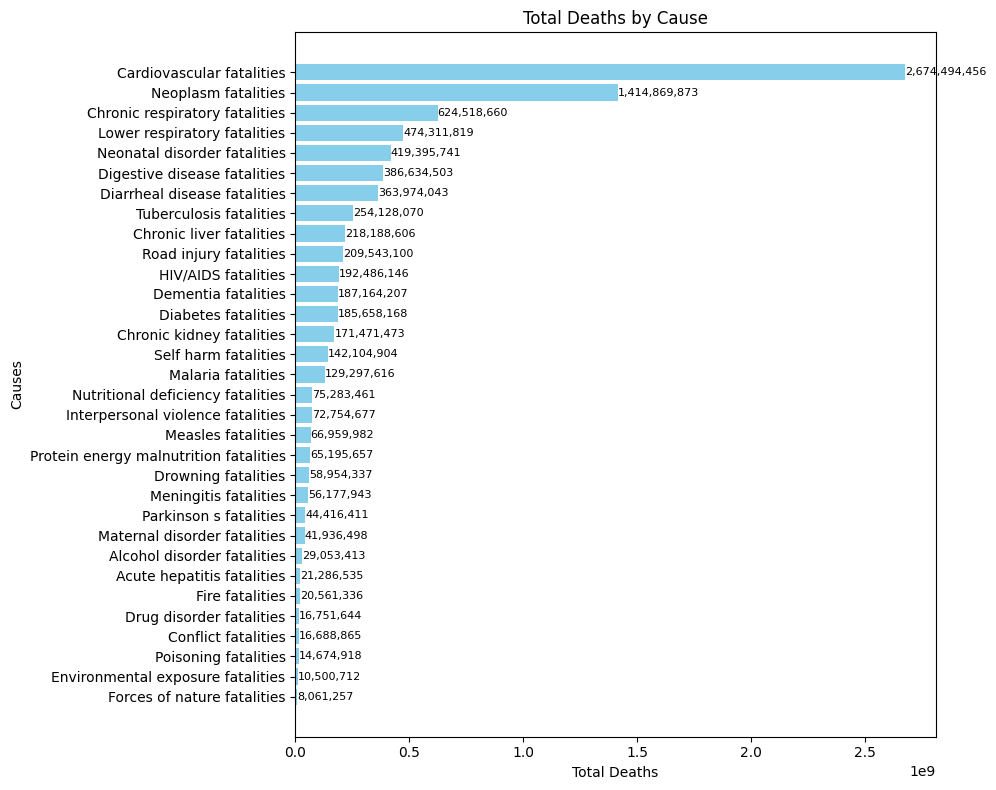

In [36]:
# Lấy dữ liệu từ DataFrame, loại bỏ các cột không cần thiết
df_causes = df.drop(['Entity', 'Code', 'Year'], axis=1)

# Tính tổng số lượng người chết theo từng loại nguyên nhân và sắp xếp giảm dần
total_deaths_by_cause = df_causes.sum().sort_values(ascending=True)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 8))
bars = plt.barh(total_deaths_by_cause.index, total_deaths_by_cause.values, color='skyblue')

# Hiển thị con số chính xác trên mỗi cột
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             '{:,}'.format(int(bar.get_width())), 
             va='center', ha='left', fontsize=8)

plt.title('Total Deaths by Cause')
plt.xlabel('Total Deaths')
plt.ylabel('Causes')
plt.tight_layout()
plt.show()

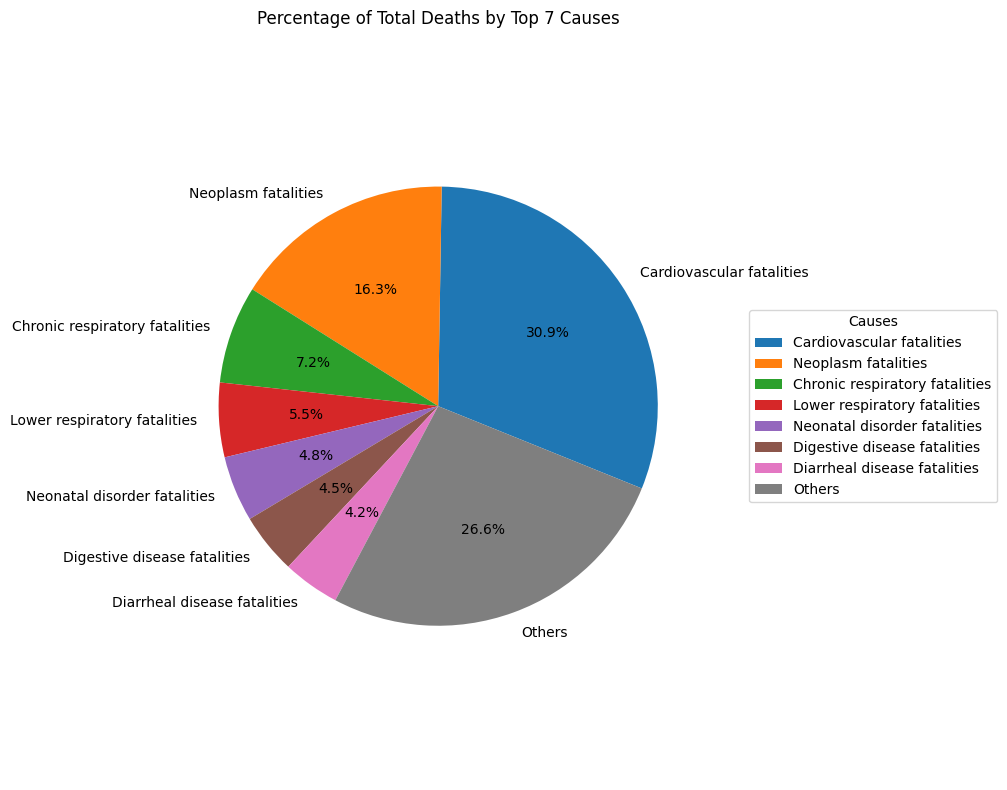

In [55]:


# Lấy 7 nguyên nhân có số lượng ca tử vong lớn nhất
top_7_causes = total_deaths_by_cause.nlargest(7)

# Tính tổng số lượng ca tử vong của các nguyên nhân còn lại
other_causes_total_deaths = total_deaths_by_cause.drop(top_7_causes.index).sum()

# Gộp các nguyên nhân còn lại thành một nhóm "Others"
top_7_causes['Others'] = other_causes_total_deaths

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
plt.figure(figsize=(10, 8))
plt.pie(top_7_causes, labels=top_7_causes.index, autopct='%1.1f%%', startangle=-22)
plt.title('Percentage of Total Deaths by Top 7 Causes')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.legend(title="Causes", loc="center left", bbox_to_anchor=(1, 0, 0.7, 1))
plt.tight_layout()
plt.show()

In [56]:
vietnam_data = df[df["Code"]=="VNM"]
print(vietnam_data)

       Entity Code  Year  Meningitis fatalities  Dementia fatalities  \
6510  Vietnam  VNM  1990                   2049                 7765   
6511  Vietnam  VNM  1991                   2078                 7880   
6512  Vietnam  VNM  1992                   1939                 8002   
6513  Vietnam  VNM  1993                   1829                 8138   
6514  Vietnam  VNM  1994                   1757                 8300   
6515  Vietnam  VNM  1995                   1659                 8482   
6516  Vietnam  VNM  1996                   1570                 8675   
6517  Vietnam  VNM  1997                   1466                 8882   
6518  Vietnam  VNM  1998                   1542                 9103   
6519  Vietnam  VNM  1999                   1348                 9350   
6520  Vietnam  VNM  2000                   1297                 9640   
6521  Vietnam  VNM  2001                   1264                 9990   
6522  Vietnam  VNM  2002                   1241                1

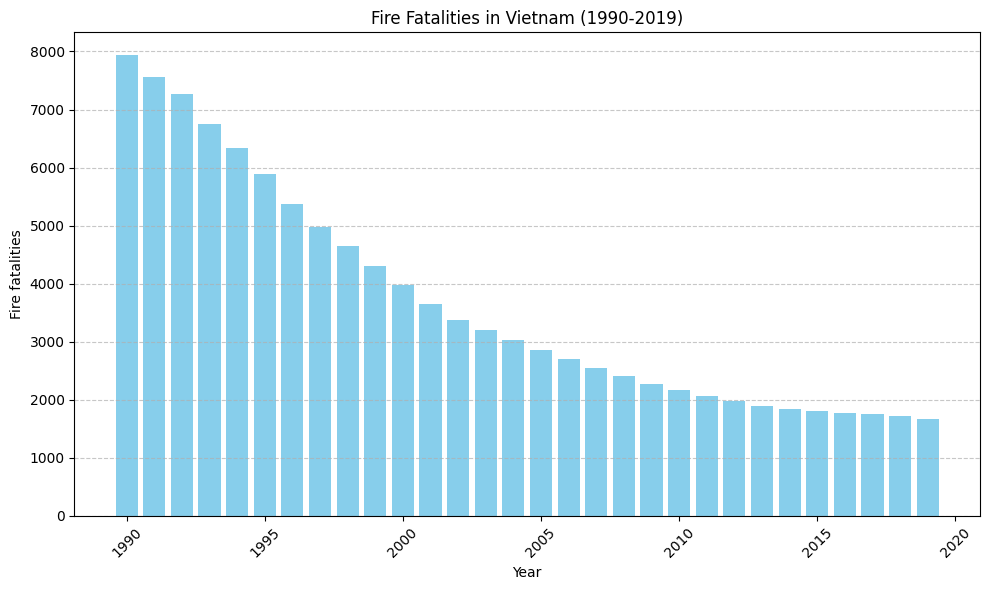

In [63]:
# Lấy dữ liệu của các vụ cháy (Fire fatalities)
fire_fatalities = vietnam_data["Diarrheal disease fatalities"]

# Lấy dữ liệu của các năm
years = vietnam_data["Year"]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(years, fire_fatalities, color='skyblue')
plt.xlabel("Year")
plt.ylabel("Fire fatalities")
plt.title("Fire Fatalities in Vietnam (1990-2019)")
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Hiển thị lưới cho trục y
plt.tight_layout()  # Đảm bảo layout của biểu đồ được hiển thị đầy đủ
plt.show()